# UAS Data Mining

# Bussines Understanding

Permasalahan:
- Khaled adalah seorang manager marketing di sebuah perusahaan online terbesar di Indonesia.
- Khaled memulai pemasaran produk e-Reader versi 2 pada situs-situs web perusahan mereka yang besar.
- Khaled ingin menganalisis lebih lanjut dengan menggunakan pendekatan data mining tentang
apa yang akan membuat beberapa orang termotivasi untuk membeli sebuah produk e-reader
segera, selanjutnya, atau membelinya nanti.
- Dengan menggunakan teknik data mining, khaled percaya dia dapat memprediksi kapan pelanggan akan siap membeli e-Reader
versi terbaru dan ini akan membantu dirinya untuk memetakan target pemasaran kepada
orang-orang yang siap merespon iklan yang diberikan.
- Khaled meminta divisi Riset dan Teknologi untuk memberikan data terkait dengan aktivitas pelanggan pada situs online
mereka.

Tujuan:
- Memprediksi kapan pelanggan akan siap membeli e-Reader versi terbaru.

# Data Understanding

In [6]:
from google.colab import files
train_upload = files.upload()
test_upload = files.upload()

Saving eReaderAdoption-Training.csv to eReaderAdoption-Training.csv


Saving eReaderAdoption-Scoring.csv to eReaderAdoption-Scoring.csv


In [9]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [95]:
data_train = pd.read_csv('eReaderAdoption-Training.csv')
data_test = pd.read_csv('eReaderAdoption-Scoring.csv')

In [98]:
## Menampilkan 5 data teratas dari data train
data_train.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [100]:
## Check berapa data dan kolom pada data train
data_train.shape

(661, 11)

In [101]:
## Menampilkan 5 data terakhir pada data train
data_train.tail()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption
656,8450,M,48,S,Frequent,Yes,Yes,Yes,Yes,Website Account,Late Majority
657,2048,F,32,M,Regular,Yes,No,Yes,No,Website Account,Early Adopter
658,9630,F,26,M,Seldom,Yes,No,Yes,Yes,Website Account,Early Majority
659,9982,F,55,S,Seldom,Yes,No,Yes,No,Monthly Billing,Early Adopter
660,2542,M,57,S,Regular,No,Yes,Yes,Yes,Bank Transfer,Early Majority


In [102]:
## Menampilkan info dari data train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    661 non-null    int64 
 1   Gender                     661 non-null    object
 2   Age                        661 non-null    int64 
 3   Marital_Status             661 non-null    object
 4   Website_Activity           661 non-null    object
 5   Browsed_Electronics_12Mo   661 non-null    object
 6   Bought_Electronics_12Mo    661 non-null    object
 7   Bought_Digital_Media_18Mo  661 non-null    object
 8   Bought_Digital_Books       661 non-null    object
 9   Payment_Method             661 non-null    object
 10  eReader_Adoption           661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB


# Data Preparation

## Data Loading

In [19]:
data_train

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority
...,...,...,...,...,...,...,...,...,...,...,...
656,8450,M,48,S,Frequent,Yes,Yes,Yes,Yes,Website Account,Late Majority
657,2048,F,32,M,Regular,Yes,No,Yes,No,Website Account,Early Adopter
658,9630,F,26,M,Seldom,Yes,No,Yes,Yes,Website Account,Early Majority
659,9982,F,55,S,Seldom,Yes,No,Yes,No,Monthly Billing,Early Adopter


In [20]:
data_test

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account
...,...,...,...,...,...,...,...,...,...,...
468,45102,M,60,S,Seldom,Yes,No,Yes,Yes,Bank Transfer
469,96393,F,24,S,Seldom,Yes,No,No,No,Credit Card
470,40897,M,23,M,Regular,Yes,Yes,Yes,Yes,Website Account
471,23653,F,36,S,Seldom,Yes,No,Yes,No,Bank Transfer


# **EXPLORATORY DATA ANALYSIS**

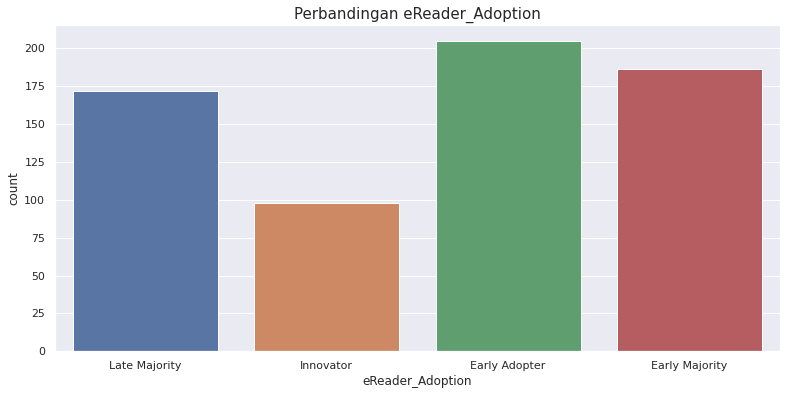

In [22]:
sns.set(rc={'figure.figsize':(13,6)})
sns.countplot(data=data_train, x='eReader_Adoption')
plt.title('Perbandingan eReader_Adoption', size=15)
plt.show()

Berdasarkan grafik diatas kita bisa melihat bahwa Early adoptor mempunyai nilai tertinggi dengan skor 205 pelanggan, dan yang mendapatkan nilai terendah berada di Innovator dengan skor 98 pelanggan.

# **DATA PREPROCESSING**

Pada bagian ini kita akan melakukan feature engineering seperti, melakukan split antara Train dan Test, handling outliers dan handling missing value dll.

Kita akan melakukan Split data antara X dan y

In [23]:
X = data_train.drop('eReader_Adoption', axis=1)
y = data_train['eReader_Adoption']

Kita akan mengubah target kita akan menjadi binary

In [82]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([3, 2, 0, 0, 3, 1, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3, 0, 0, 1, 3, 0, 1,
       3, 3, 3, 2, 0, 0, 3, 0, 0, 1, 1, 1, 3, 2, 1, 3, 2, 3, 0, 3, 1, 3,
       2, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 0, 3, 0,
       1, 1, 0, 0, 0, 3, 1, 3, 1, 1, 1, 3, 1, 0, 3, 1, 2, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 3, 2, 2, 0, 1, 3, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 0, 1, 0, 1, 2, 1, 0, 0, 2, 3, 2, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 3, 3, 1, 0, 2, 0, 1, 0, 1, 1, 3, 2, 1, 1, 3,
       2, 3, 1, 2, 1, 0, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0,
       0, 3, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 1, 3, 3, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 3, 2, 1,
       3, 3, 3, 3, 0, 1, 1, 3, 0, 2, 3, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 1,
       3, 2, 1, 3, 2, 0, 3, 0, 0, 3, 0, 3, 2, 3, 1, 0, 1, 0, 1, 0, 2, 2,
       1, 3, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3, 0,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2,

Kita telah melakukan pemisahan antara feature and target, selankutnya kita akan melakukan Train Test Split.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=10)

# Display dimensional
print('X_train Shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\nX_test Shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train Shape: (561, 10)
y_train shape: (561,)

X_test Shape: (100, 10)
y_test shape: (100,)


Kita telah melakukan Train Test Split.

### Handling Outliers

Disini kita akan melakukan handling outliers.

In [26]:
def diag_outlier_plots(data):
    for col in data :
        plt.figure(figsize=(16,5))

        #Histogram
        plt.subplot(1,2,1)
        sns.histplot(data[col], bins=30, linewidth=0.5)
        plt.title('Histogram')

        #boxplot
        plt.subplot(1,2,2)
        sns.boxplot(y=data[col], linewidth=0.5)
        plt.title('Boxplot')
        plt.show()

In [79]:
cek_ouliers = X_train.select_dtypes(include=np.number)
cek_ouliers

,Age
191,34
600,46
524,58
142,25
303,35
...,...
369,63
320,37
527,64
125,20


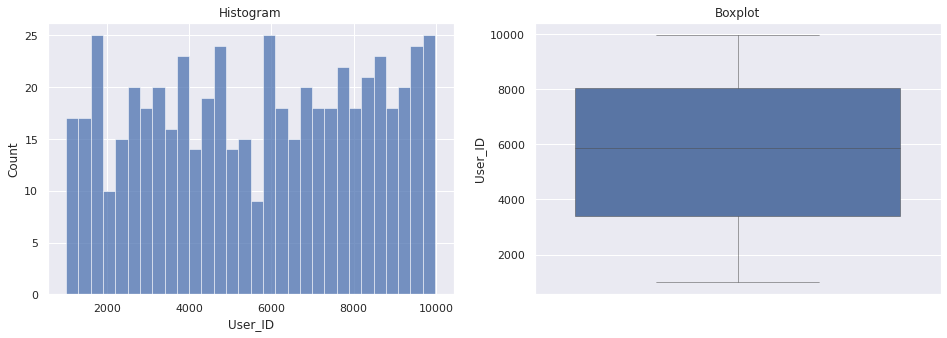

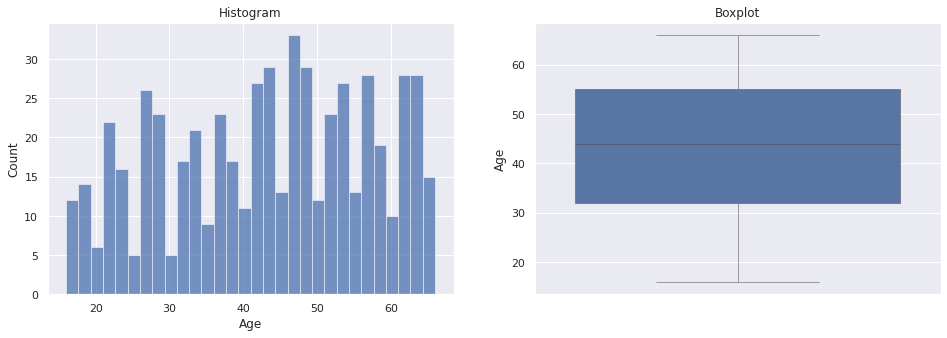

In [28]:
diag_outlier_plots(cek_ouliers)

Berdasarkan hasil diatas kita telah melihat bahwa tidak ada outliers dalam data kita.

## Handling Missing Value

In [91]:
data_train.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
eReader_Adoption             0
dtype: int64

## Feature Selection

Pada bagian ini kita akan menentukan kolom yang akan dijadikan feature model.

Kita akan melihat korelasi di setiap feature ke target, sebelum itu kita akan melakukan penggabungan antara X_train dan y_train.

In [77]:
# Membuat Data Frame  untuk target

y_df = pd.DataFrame(y, columns=['eReader_Adoption'])
y_df

,eReader_Adoption
0,3
1,2
2,0
3,0
4,3
...,...
656,3
657,0
658,1
659,0


setelah membuat data frame untuk y_train,selanjutnya kita akan melakukan concat terhadap X_train dan y_train.

In [76]:
# Concat

data_concat = pd.concat([X_train, y_df], axis=1)
data_concat

,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,eReader_Adoption
0,M,61.0,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,3
1,M,27.0,M,Regular,Yes,No,Yes,No,Bank Transfer,2
2,F,29.0,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,0
3,M,49.0,M,Seldom,Yes,Yes,Yes,Yes,Website Account,0
4,M,29.0,S,Seldom,Yes,Yes,Yes,No,Website Account,3
...,...,...,...,...,...,...,...,...,...,...
656,M,48.0,S,Frequent,Yes,Yes,Yes,Yes,Website Account,3
657,F,32.0,M,Regular,Yes,No,Yes,No,Website Account,0
658,F,26.0,M,Seldom,Yes,No,Yes,Yes,Website Account,1
659,F,55.0,S,Seldom,Yes,No,Yes,No,Monthly Billing,0


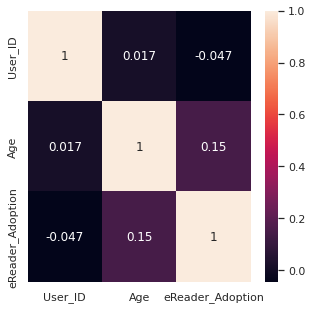

In [32]:
# Heatmap

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(data_concat.corr(), annot=True)

**Berdasarkan** hasil heatmap diatas, kita mengetahui bahwa kolom User ID tidak mempunyai korelasi yang baik terhadap target. Dalam kasus ini saya akan membuang kolom User ID dalam feature model.

In [33]:
X_train.drop('User_ID', inplace=True, axis=1)

In [34]:
X_test.drop('User_ID', inplace=True, axis=1)

Kita telah selesai melakukan Feature Selection

## Generate Pipeline

Numerical columns

In [75]:
# Numeric Skewed

numeric = ['Age']
numeric_trs = StandardScaler()

StandardScaler()

Categorical columns

In [36]:
# Display X_train

X_train.select_dtypes(include=['object']).head()

,Gender,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
191,M,M,Seldom,Yes,No,Yes,Yes,Website Account
600,M,M,Seldom,Yes,Yes,Yes,Yes,Monthly Billing
524,M,M,Seldom,Yes,No,Yes,No,Credit Card
142,M,S,Regular,Yes,Yes,Yes,No,Website Account
303,F,M,Seldom,Yes,No,Yes,Yes,Monthly Billing


In [74]:
# Categorical Columns

categorical = ['Gender','Marital_Status','Website_Activity','Browsed_Electronics_12Mo','Bought_Electronics_12Mo',
                'Bought_Digital_Media_18Mo','Bought_Digital_Books','Payment_Method']
categorical_trs = OneHotEncoder(handle_unknown='ignore')

categorical


['Gender',
 'Marital_Status',
 'Website_Activity',
 'Browsed_Electronics_12Mo',
 'Bought_Electronics_12Mo',
 'Bought_Digital_Media_18Mo',
 'Bought_Digital_Books',
 'Payment_Method']

Column Transformer

In [70]:
# Preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ("num_columns", numeric_trs, numeric),
        ("cat_columns", categorical_trs, categorical)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num_columns', StandardScaler(), ['Age']),
                                ('cat_columns',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Marital_Status',
                                  'Website_Activity',
                                  'Browsed_Electronics_12Mo',
                                  'Bought_Electronics_12Mo',
                                  'Bought_Digital_Media_18Mo',
                                  'Bought_Digital_Books', 'Payment_Method'])])

# **MODEL DEFINITION**

Pada bagian ini, kita akan melakukan definisi dari model yang akan kita buat. Dalam kasus ini tugas kita adalah membuat model klasifikasi, dengan 3 algoritma Decision Tree , Super Vector Machine Classfier dan Logistic Regression.

**Pipeline Decision Tree Classifier**

In [92]:
# Pipeline

pipe_DTC = Pipeline(
    steps=[("preprocessor", preprocessor), ("DTC", DecisionTreeClassifier(random_state=10))]
)

dtc = pipe_DTC.fit(X_train, y_train)

dtc


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_columns',
                                                  StandardScaler(), ['Age']),
                                                 ('cat_columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Marital_Status',
                                                   'Website_Activity',
                                                   'Browsed_Electronics_12Mo',
                                                   'Bought_Electronics_12Mo',
                                                   'Bought_Digital_Media_18Mo',
                                                   'Bought_Digital_Books',
                                                   'Payment_Method'])])),
                ('DTC', DecisionTreeClassifier(random_state=10))])

**Pipeline Logistic Regression Classifier**

In [93]:
# Pipeline

pipe_LR = Pipeline(
    steps=[("preprocessor", preprocessor), ("LR", LogisticRegression(random_state=10))]
)

lr = pipe_LR.fit(X_train, y_train)

lr


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_columns',
                                                  StandardScaler(), ['Age']),
                                                 ('cat_columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Marital_Status',
                                                   'Website_Activity',
                                                   'Browsed_Electronics_12Mo',
                                                   'Bought_Electronics_12Mo',
                                                   'Bought_Digital_Media_18Mo',
                                                   'Bought_Digital_Books',
                                                   'Payment_Method'])])),
                ('LR', LogisticRegression(random_state=10))])

**Pipeline Super Vector Machine (SVC) Classifier**

In [94]:
# Pipeline

pipe_SVC = Pipeline(
    steps=[("preprocessor", preprocessor), ("SVC", SVC(random_state=10))]
)

svc = pipe_SVC.fit(X_train, y_train)
svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_columns',
                                                  StandardScaler(), ['Age']),
                                                 ('cat_columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Marital_Status',
                                                   'Website_Activity',
                                                   'Browsed_Electronics_12Mo',
                                                   'Bought_Electronics_12Mo',
                                                   'Bought_Digital_Media_18Mo',
                                                   'Bought_Digital_Books',
                                                   'Payment_Method'])])),
                ('SVC', SVC(random_state=10))])

# **MODEL EVALUATION & IMPROVEMENT**

Pada bagian ini, kita akan melakukan evaluasi model dan improvement menggunakan grid search.

## Evaluation

In [39]:
def cek_accuracy(model):
    print('Metrics Accuracy Score')
    print('Train Score :',accuracy_score(y_train, model.predict(X_train)))
    print('Test Score  :',accuracy_score(y_test, model.predict(X_test)))

In [43]:
# Decision Tree

cek_accuracy(pipe_DTC)

Metrics Accuracy Score
Train Score : 0.8841354723707665
Test Score  : 0.45


In [44]:
# Logistic Regression

cek_accuracy(pipe_LR)

Metrics Accuracy Score
Train Score : 0.6292335115864528
Test Score  : 0.7


In [45]:
# Logistic SVC

cek_accuracy(pipe_SVC)

Metrics Accuracy Score
Train Score : 0.6844919786096256
Test Score  : 0.67


Berdasarkan hasil diatas, kita bisa melihat bahwa algoritma decision tree mempunyai nilai overfit.




## Hyperparameter Tuning/ Model Improvement

**Decisison Tree**

In [64]:
params_dtc = {
    'DTC__criterion':['gini','entropy'],
    'DTC__max_depth': [5,6],
}
grid_dtc = GridSearchCV(pipe_DTC, param_grid = params_dtc, cv=5).fit(X_train, y_train)

# Make variable for Grid Best estimator
grid_best_DTC = grid_dtc.best_estimator_

# Pipeline Final
grid_DTC_final = Pipeline(
    steps=[("grid_best_DTC", grid_best_DTC)]
)

params_dtc

{'DTC__criterion': ['gini', 'entropy'], 'DTC__max_depth': [5, 6]}

**Logistic Regression**

In [63]:
params_lr = {
    'LR__solver':['lbfgs','saga'],
    'LR__C': [5,6],
}
grid_lr = GridSearchCV(pipe_LR, param_grid = params_lr, cv=5).fit(X_train, y_train)

# Make variable for Grid Best estimator
grid_best_lr = grid_lr.best_estimator_

# Pipeline Final
grid_LR_final = Pipeline(
    steps=[("grid_best_lr", grid_best_lr)]
)

params_lr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs f

{'LR__C': [5, 6], 'LR__solver': ['lbfgs', 'saga']}

**SVC**

In [62]:
params_svc = {
    'SVC__kernel':['linear','sigmoid'],
    'SVC__C': [20],
}
grid_svc = GridSearchCV(pipe_SVC, param_grid = params_svc, cv=5).fit(X_train, y_train)

# Make variable for Grid Best estimator
grid_best_svc = grid_svc.best_estimator_

# Pipeline Final
grid_SVC_final = Pipeline(
    steps=[("grid_best_svc", grid_best_svc)]
)

params_svc

{'SVC__C': [20], 'SVC__kernel': ['linear', 'sigmoid']}

## Evaluation 2

In [50]:
def best_params(model1, model2):
    print('Result Best Params')
    print('best params:', model1.best_params_)
    print('best score:', model1.best_score_)

    print('======================='*3)
    print('Metrics Accuracy Score')
    print('Train Results:', accuracy_score(y_train, model2.predict(X_train)))
    print('Test Results:',accuracy_score(y_test, model2.predict(X_test)))

In [51]:
best_params(grid_dtc, grid_DTC_final)

Result Best Params
best params: {'DTC__criterion': 'gini', 'DTC__max_depth': 5}
best score: 0.5543141592920353
Metrics Accuracy Score
Train Results: 0.6417112299465241
Test Results: 0.59


In [52]:
best_params(grid_lr, grid_LR_final)

Result Best Params
best params: {'LR__C': 6, 'LR__solver': 'lbfgs'}
best score: 0.5632269279393174
Metrics Accuracy Score
Train Results: 0.6345811051693404
Test Results: 0.69


In [53]:
best_params(grid_svc, grid_SVC_final)

Result Best Params
best params: {'SVC__C': 20, 'SVC__kernel': 'linear'}
best score: 0.5792825537294564
Metrics Accuracy Score
Train Results: 0.5882352941176471
Test Results: 0.64


# Berdasarkan hasil dari evaluasi diatas kit abisa melihat bahwa, model setelah dilakukan Hyperparameter mengalami kenaikan performa dari masing masing algoritma.

# **MODEL SAVING**

Pada bagian ini, kita akan melakukan saving model 

In [54]:
# Save the best model
with open('grid_DTC_final.pkl', 'wb') as file1:
    pickle.dump(grid_DTC_final, file1)

# **MODEL INFERENCE**

Pada bagian ini kita akan melakukan test terhadap model inference atau data test.

In [55]:
# Display Data Test

data_test

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
0,56031,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer
1,25913,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer
2,19396,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account
3,93666,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card
4,72282,F,31,S,Seldom,Yes,No,Yes,No,Website Account
...,...,...,...,...,...,...,...,...,...,...
468,45102,M,60,S,Seldom,Yes,No,Yes,Yes,Bank Transfer
469,96393,F,24,S,Seldom,Yes,No,No,No,Credit Card
470,40897,M,23,M,Regular,Yes,Yes,Yes,Yes,Website Account
471,23653,F,36,S,Seldom,Yes,No,Yes,No,Bank Transfer


## Handling Missing Value

In [56]:
data_test.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
dtype: int64

Hasil menunjukan bahwa tidak ada missing value dalam data_test, mengingat kita telah melakukan drop terhadap kolom User ID pada X_train dan X_test maka dari itu kita juga akan melakukan hal yang sama terhadap data inference atau data yang akan kita lakukan prediksi.

In [57]:
data_test.drop('User_ID', inplace=True, axis=1)

## Predict

Kita akan melakukan prediksi terhadap data test

In [58]:
pred = grid_DTC_final.predict(data_test)
pred

array([2, 0, 3, 1, 3, 1, 3, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 3, 3, 0, 3, 0,
       0, 3, 0, 3, 2, 2, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 3, 0, 2, 2, 0, 2, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1,
       3, 1, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 1, 3, 2, 3, 3, 3, 3, 0, 3, 0, 2, 3, 0, 2, 3, 3,
       3, 1, 0, 3, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 3, 3, 2, 3, 1, 3, 1, 3,
       2, 0, 0, 3, 2, 0, 3, 2, 0, 0, 3, 2, 0, 0, 0, 3, 0, 3, 3, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 3, 0, 3, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2,
       0, 0, 3, 0, 3, 3, 3, 1, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 0, 0, 2, 3,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 1, 0, 2, 0, 3, 3, 0, 3, 0, 0, 3,
       3, 3, 0, 1, 3, 0, 3, 0, 3, 2, 1, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 3, 0, 2, 0, 0, 0, 3,
       3, 2, 3, 0, 0, 3, 3, 3, 3, 0, 0, 2, 0, 3, 0, 0, 0, 3, 2, 2, 1, 0,
       0, 3, 3, 0, 3, 0, 2, 1, 1, 3, 0, 3, 0, 0, 1,

Kita telah berhasil melakukan prediksi data test, selanjutnya kita akan membuat data frame terhadao hasil dari prediksi.

In [61]:
df_predict = pd.DataFrame(pred, columns=['Decision Tree(pred)'])
df_predict

,Decision Tree(pred)
0,2
1,0
2,3
3,1
4,3
...,...
468,0
469,3
470,2
471,3


In [60]:
prediction = pd.concat([data_test, df_predict], axis=1)
prediction

,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Decision Tree(pred)
0,M,57,S,Regular,Yes,Yes,Yes,Yes,Bank Transfer,2
1,F,51,M,Regular,Yes,Yes,No,No,Bank Transfer,0
2,M,41,M,Seldom,Yes,Yes,Yes,No,Website Account,3
3,M,66,S,Regular,Yes,Yes,Yes,Yes,Credit Card,1
4,F,31,S,Seldom,Yes,No,Yes,No,Website Account,3
...,...,...,...,...,...,...,...,...,...,...
468,M,60,S,Seldom,Yes,No,Yes,Yes,Bank Transfer,0
469,F,24,S,Seldom,Yes,No,No,No,Credit Card,3
470,M,23,M,Regular,Yes,Yes,Yes,Yes,Website Account,2
471,F,36,S,Seldom,Yes,No,Yes,No,Bank Transfer,3


Kita telah melihat bahwa model yang kita buat telah berhasil melakukan kalsifikasi terhadap data baru.